## LeNet for MNIST classification

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


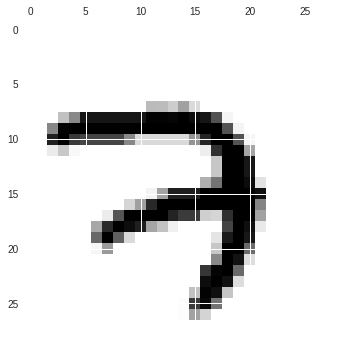

In [3]:
plt.matshow(mnist.train.images[0].reshape((28,28)))
plt.show()

In [0]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1], name='X')
Y = tf.placeholder(tf.float32, [None, 10], name='Y')

In [0]:
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], stddev=0.1))
b1 = tf.Variable(tf.ones([6])/10)

W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], stddev=0.1))
b2 = tf.Variable(tf.ones([16])/10)

In [0]:
conv1 = tf.nn.relu(
    tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding="SAME") + b1)

pool1 = tf.nn.max_pool(conv1,
                       ksize=[1, 2, 2, 1],
                       strides = [1, 2, 2, 1],
                       padding="SAME")

conv2 = tf.nn.relu(
    tf.nn.conv2d(pool1, W2, strides=[1, 1, 1, 1], padding="SAME") + b2)

pool2 = tf.nn.max_pool(conv2,
                       ksize=[1, 2, 2, 1],
                       strides = [1, 2, 2, 1],
                       padding="SAME")

flatten = tf.reshape(pool2, [-1, 16*7*7])

In [0]:
W3 = tf.Variable(tf.truncated_normal([16*7*7, 120], stddev=0.1))
b3 = tf.Variable(tf.ones([120])/10)

W4 = tf.Variable(tf.truncated_normal([120, 84], stddev=0.1))
b4 = tf.Variable(tf.ones([84])/10)

W5 = tf.Variable(tf.truncated_normal([84, 10], stddev=0.1))
b5 = tf.Variable(tf.ones([10])/10)

In [0]:
# drop_out1 = tf.nn.dropout(flatten, 0.4)

fc1 = tf.nn.relu(tf.matmul(flatten, W3) + b3)

# drop_out2 = tf.nn.dropout(fc1, 0.4)

fc2 = tf.nn.relu(tf.matmul(fc1, W4) + b4)


Z = tf.matmul(fc2, W5) + b5

Y_ = tf.nn.softmax(Z)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=Y)

loss_objective = tf.reduce_mean(cross_entropy)*100

In [0]:
learning_rate = 0.001

training = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(loss_objective)

In [0]:
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [12]:
init = tf.global_variables_initializer()

epochs = 5
iterations = 500

train_err = []
train_acc = []

test_accuracy, test_loss = 0, 99999

with tf.Session() as sess:
  
  sess.run(init)
  
  for epoch in range(epochs):
    
    print('\nEpoch : {0}\n'.format(epoch+1))
    
    for i in range(iterations+1):
          
      batch_X, batch_Y = mnist.train.next_batch(100)
      batch_X = np.reshape(batch_X, (-1, 28, 28, 1))
      step = sess.run(training, feed_dict={X: batch_X, Y: batch_Y})
      
      if i % 100 == 0:

        train_accuracy, new_err = sess.run([accuracy, loss_objective],
                                           feed_dict={X: batch_X, Y: batch_Y})  
        
        train_acc.append(train_accuracy); train_err.append(new_err)
        
        print('{2} Training Accuracy : {0} | Loss : {1}'.format(train_accuracy,
                                                                new_err, i))
        
  
  batch_X, batch_Y = mnist.validation.images, mnist.validation.labels
  batch_X = np.reshape(batch_X, (-1, 28, 28, 1))

  val_accuracy, val_loss = sess.run([accuracy, loss_objective],
                                    feed_dict={X: batch_X, Y: batch_Y})
  
  print('\nValidation Accuracy : {0} | Loss : {1}'.format(val_accuracy,
                                                          val_loss))

  batch_X, batch_Y = mnist.test.images, mnist.test.labels
  batch_X = np.reshape(batch_X, (-1, 28, 28, 1))

  test_accuracy, test_loss = sess.run([accuracy, loss_objective],
                                      feed_dict={X: batch_X, Y: batch_Y})  


Epoch : 1

0 Training Accuracy : 0.09000000357627869 | Loss : 230.72386169433594
100 Training Accuracy : 0.9100000262260437 | Loss : 23.432987213134766
200 Training Accuracy : 0.9700000286102295 | Loss : 15.549623489379883
300 Training Accuracy : 0.9800000190734863 | Loss : 4.88357400894165
400 Training Accuracy : 1.0 | Loss : 4.831546783447266
500 Training Accuracy : 0.9900000095367432 | Loss : 3.250980854034424

Epoch : 2

0 Training Accuracy : 0.9900000095367432 | Loss : 3.1790456771850586
100 Training Accuracy : 1.0 | Loss : 2.2342658042907715
200 Training Accuracy : 0.9900000095367432 | Loss : 2.94486927986145
300 Training Accuracy : 1.0 | Loss : 2.9101932048797607
400 Training Accuracy : 0.9900000095367432 | Loss : 3.389744520187378
500 Training Accuracy : 1.0 | Loss : 1.1675102710723877

Epoch : 3

0 Training Accuracy : 0.9800000190734863 | Loss : 6.132957935333252
100 Training Accuracy : 1.0 | Loss : 1.1962836980819702
200 Training Accuracy : 1.0 | Loss : 1.7145755290985107
30

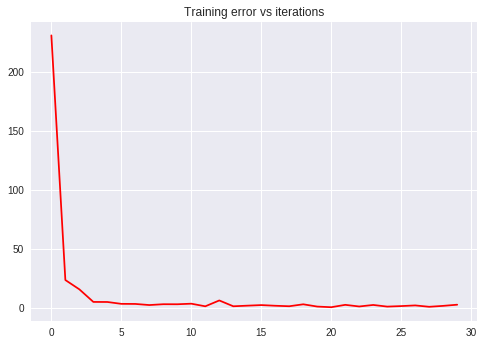

In [13]:
plt.plot(range(len(train_err)), train_err, color='red')
plt.title('Training error vs iterations')
plt.show()

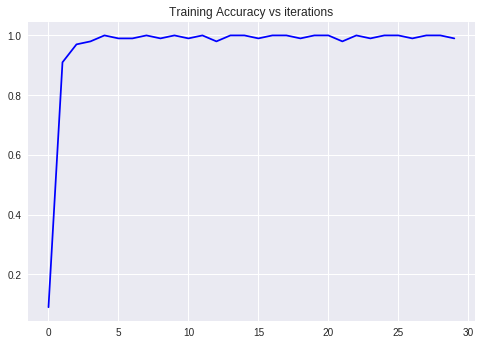

In [14]:
plt.plot(range(len(train_acc)), train_acc, color='blue')
plt.title('Training Accuracy vs iterations')
plt.show()

In [15]:
  print('\nTest Accuracy : {0} \nTest Loss : {1}'.format(test_accuracy,
                                                         test_loss))


Test Accuracy : 0.9833999872207642 
Test Loss : 4.8419623374938965
